In [9]:
from taupy import * 
import taupy.simulation.strategies as strategies

In [10]:
randompos = [Position(debate=None, introduction_strategy=strategies.random) for _ in range(6)]
attackpos = [Position(debate=None, introduction_strategy=strategies.attack) for _ in range(6)]
fortifypos = [Position(debate=None, introduction_strategy=strategies.fortify) for _ in range(6)]
undercutpos = [Position(debate=None, introduction_strategy=strategies.undercut) for _ in range(6)]
convertpos = [Position(debate=None, introduction_strategy=strategies.undercut) for _ in range(6)]


In [11]:
e_r = experiment(8, simulations={"positions": randompos, "sentencepool": "p:10", "argumentlength": [2,3]}, runs = {"max_density": 0.8, "max_steps": 200})

Simulation 1/8 completed.
Simulation 2/8 completed.
Simulation 3/8 completed.
Simulation 4/8 completed.
Simulation 5/8 completed.
Simulation 6/8 completed.
Simulation 7/8 completed.
Simulation 8/8 completed.


In [12]:
e_a = experiment(8, simulations={"positions": attackpos, "sentencepool": "p:10", "argumentlength": [2,3]}, runs = {"max_density": 0.8, "max_steps": 200})

Simulation 1/8 completed.
Simulation 2/8 completed.
Simulation 3/8 completed.
Simulation 4/8 completed.
Simulation 5/8 completed.
Simulation 6/8 completed.
Simulation 7/8 completed.
Simulation 8/8 completed.


In [13]:
e_f = experiment(8, simulations={"positions": fortifypos, "sentencepool": "p:10", "argumentlength": [2,3]}, runs = {"max_density": 0.8, "max_steps": 200})

Simulation 1/8 completed.
Simulation 2/8 completed.
Simulation 3/8 completed.
Simulation 4/8 completed.
Simulation 5/8 completed.
Simulation 6/8 completed.
Simulation 7/8 completed.
Simulation 8/8 completed.


In [14]:
e_u = experiment(8, simulations={"positions": undercutpos, "sentencepool": "p:10", "argumentlength": [2,3]}, runs = {"max_density": 0.8, "max_steps": 200})

Simulation 1/8 completed.
Simulation 2/8 completed.
Simulation 3/8 completed.
Simulation 4/8 completed.
Simulation 5/8 completed.
Simulation 6/8 completed.
Simulation 7/8 completed.
Simulation 8/8 completed.


In [15]:
e_c = experiment(8, simulations={"positions": convertpos, "sentencepool": "p:10", "argumentlength": [2,3]}, runs = {"max_density": 0.8, "max_steps": 200})

Simulation 1/8 completed.
Simulation 2/8 completed.
Simulation 3/8 completed.
Simulation 4/8 completed.
Simulation 5/8 completed.
Simulation 6/8 completed.
Simulation 7/8 completed.
Simulation 8/8 completed.


In [16]:
import matplotlib.pyplot as plt

In [17]:
from concurrent.futures import (ProcessPoolExecutor, as_completed)

In [18]:
with ProcessPoolExecutor() as executor:
    results = [[executor.submit(pairwise_dispersion, e_r[j][i].list_of_positions(), measure=normalised_hamming_distance) for i in range(len(e_r[j]))] for j in range(len(e_r))]

er_pairwise = [[i.result() for i in j] for j in results]

#e_pairwise = [[pairwise_dispersion(e[j][i].list_of_positions(), measure=normalised_hamming_distance) for i in range(len(e[j]))] for j in range(len(e))]

In [19]:
with ProcessPoolExecutor() as executor:
    results = [[executor.submit(pairwise_dispersion, e_a[j][i].list_of_positions(), measure=normalised_hamming_distance) for i in range(len(e_a[j]))] for j in range(len(e_a))]

ea_pairwise = [[i.result() for i in j] for j in results]

In [20]:
with ProcessPoolExecutor() as executor:
    results = [[executor.submit(pairwise_dispersion, e_f[j][i].list_of_positions(), measure=normalised_hamming_distance) for i in range(len(e_f[j]))] for j in range(len(e_f))]

ef_pairwise = [[i.result() for i in j] for j in results]

In [21]:
with ProcessPoolExecutor() as executor:
    results = [[executor.submit(pairwise_dispersion, e_u[j][i].list_of_positions(), measure=normalised_hamming_distance) for i in range(len(e_u[j]))] for j in range(len(e_u))]

eu_pairwise = [[i.result() for i in j] for j in results]

In [22]:
with ProcessPoolExecutor() as executor:
    results = [[executor.submit(pairwise_dispersion, e_c[j][i].list_of_positions(), measure=normalised_hamming_distance) for i in range(len(e_c[j]))] for j in range(len(e_c))]

ec_pairwise = [[i.result() for i in j] for j in results]

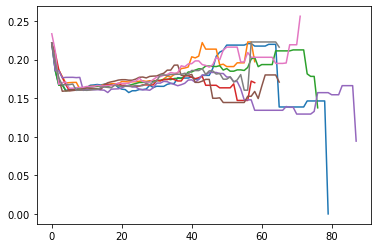

In [58]:
for i in er_pairwise:
    plt.plot(i)
#plt.show()
plt.savefig("er_pairwise.pdf",bbox_inches="tight")

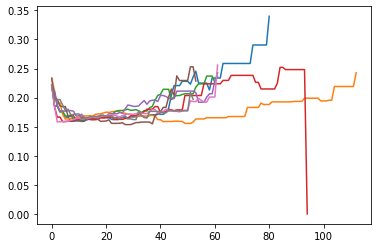

In [59]:
for i in ef_pairwise:
    plt.plot(i)
#plt.show()
plt.savefig("ef_pairwise.pdf",bbox_inches="tight")

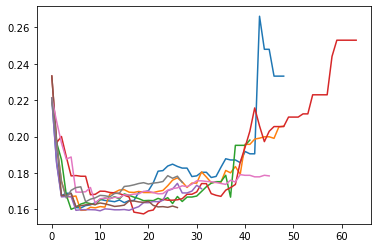

In [60]:
for i in ea_pairwise:
    plt.plot(i)
#plt.show()
plt.savefig("ea_pairwise.pdf",bbox_inches="tight")

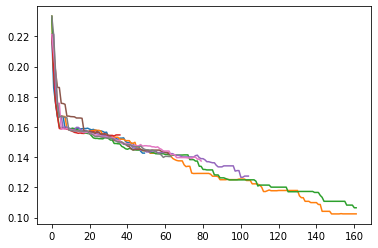

In [61]:
for i in eu_pairwise:
    plt.plot(i)
#plt.show()
plt.savefig("eu_pairwise.pdf",bbox_inches="tight")

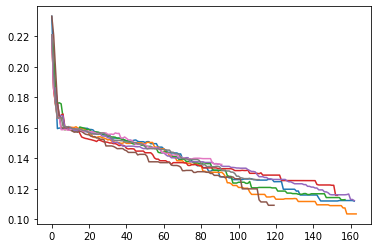

In [62]:
for i in ec_pairwise:
    plt.plot(i)
#plt.show()
plt.savefig("ec_pairwise.pdf",bbox_inches="tight")

In [29]:
def analyse_divergence(experiment):
    return [[group_divergence(experiment[j][i], measure=normalised_hamming_distance) for i in range(len(experiment[j]))] for j in range(len(experiment))]

with ProcessPoolExecutor() as executor:
    results_r = executor.submit(analyse_divergence, e_r)
    results_f = executor.submit(analyse_divergence, e_f)
    results_a = executor.submit(analyse_divergence, e_a)
    results_c = executor.submit(analyse_divergence, e_c)
    results_u = executor.submit(analyse_divergence, e_u)

er_divergence = results_r.result()
ef_divergence = results_f.result()
ea_divergence = results_a.result()
ec_divergence = results_c.result()
eu_divergence = results_u.result()

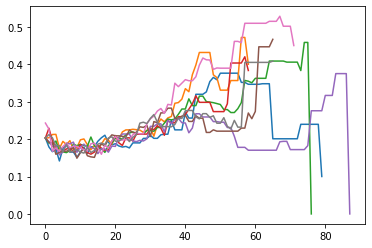

In [49]:
for i in er_divergence:
    plt.plot(i)
#plt.show()
plt.savefig("er_divergence.pdf",bbox_inches="tight")

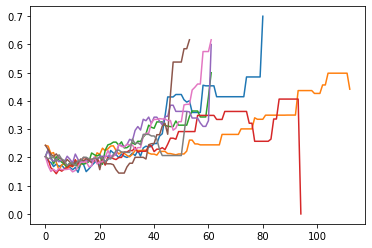

In [50]:
for i in ef_divergence:
    plt.plot(i)
#plt.show()
plt.savefig("ef_divergence.pdf",bbox_inches="tight")

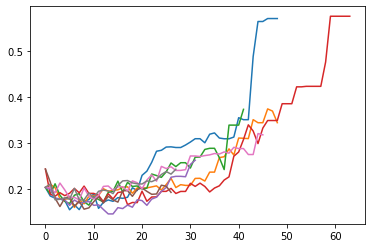

In [51]:
for i in ea_divergence:
    plt.plot(i)
#plt.show()
plt.savefig("ea_divergence.pdf",bbox_inches="tight")

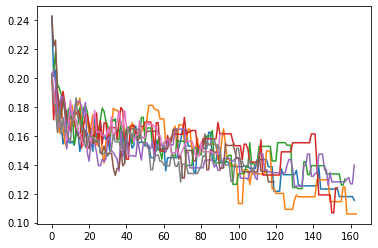

In [52]:
for i in ec_divergence:
    plt.plot(i)
#plt.show()
plt.savefig("ec_divergence.pdf",bbox_inches="tight")

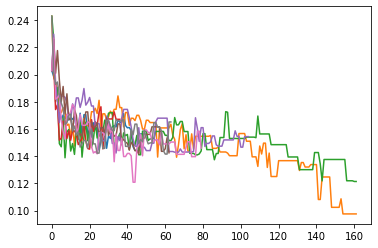

In [53]:
for i in eu_divergence:
    plt.plot(i)
#plt.show()
plt.savefig("eu_divergence.pdf",bbox_inches="tight")

In [35]:
def analyse_consensus(experiment):
    return [[group_consensus(experiment[j][i], measure=normalised_hamming_distance) for i in range(len(experiment[j]))] for j in range(len(experiment))]

with ProcessPoolExecutor() as executor:
    results_r = executor.submit(analyse_consensus, e_r)
    results_f = executor.submit(analyse_consensus, e_f)
    results_a = executor.submit(analyse_consensus, e_a)
    results_c = executor.submit(analyse_consensus, e_c)
    results_u = executor.submit(analyse_consensus, e_u)

er_consensus = results_r.result()
ef_consensus = results_f.result()
ea_consensus = results_a.result()
ec_consensus = results_c.result()
eu_consensus = results_u.result()

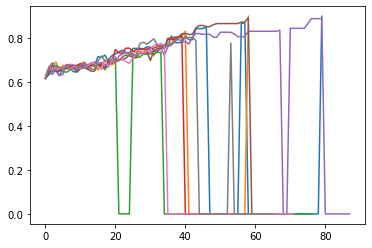

In [54]:
for i in er_consensus:
    plt.plot(i)
#plt.show()
plt.savefig("er_consensus.pdf",bbox_inches="tight")

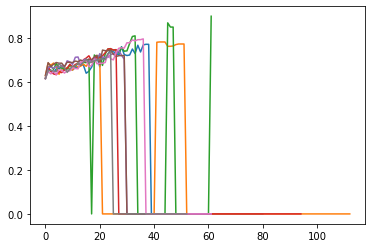

In [55]:
for i in ef_consensus:
    plt.plot(i)
#plt.show()
plt.savefig("ef_consensus.pdf",bbox_inches="tight")

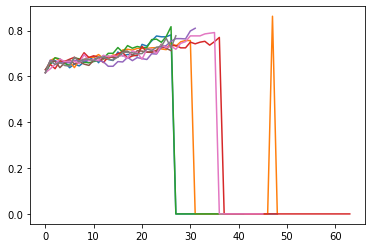

In [56]:
for i in ea_consensus:
    plt.plot(i)
#plt.show()
plt.savefig("ea_consensus.pdf",bbox_inches="tight")

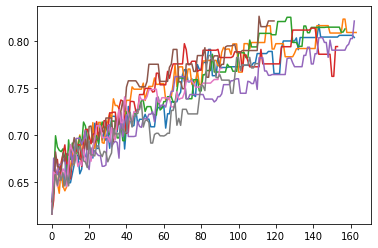

In [57]:
for i in ec_consensus:
    plt.plot(i)
#plt.show()
plt.savefig("ec_consensus.pdf",bbox_inches="tight")

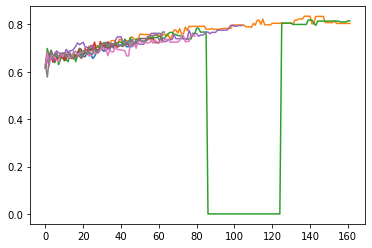

In [48]:
for i in eu_consensus:
    plt.plot(i)
#plt.show()
plt.savefig("eu_consensus.pdf",bbox_inches="tight")

In [44]:
er_density = [[i.density() for i in j] for j in e_r]
ef_density = [[i.density() for i in j] for j in e_f]
ea_density = [[i.density() for i in j] for j in e_a]
ec_density = [[i.density() for i in j] for j in e_c]
eu_density = [[i.density() for i in j] for j in e_u]

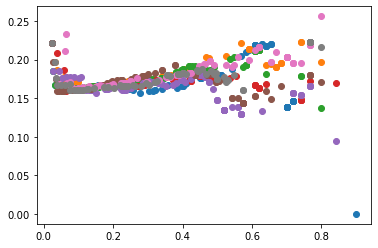

In [69]:
for (i,j) in zip(er_density, er_pairwise):
    plt.scatter(i, j)

plt.savefig("density_er_pairwise.pdf",bbox_inches="tight")

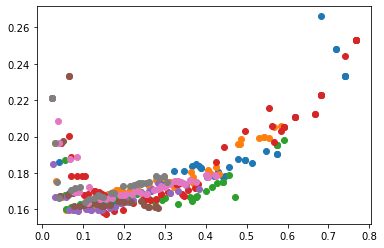

In [70]:
for (i,j) in zip(ea_density, ea_pairwise):
    plt.scatter(i, j)

plt.savefig("density_ea_pairwise.pdf",bbox_inches="tight")

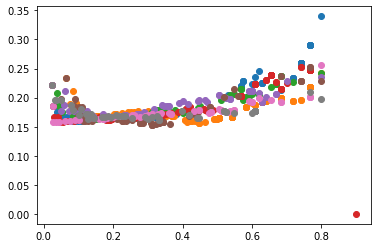

In [71]:
for (i,j) in zip(ef_density, ef_pairwise):
    plt.scatter(i, j)

plt.savefig("density_ef_pairwise.pdf",bbox_inches="tight")

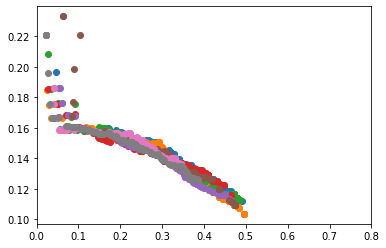

In [99]:
plt.xlim(0,0.8)
for (i,j) in zip(ec_density, ec_pairwise):
    plt.scatter(i, j)

plt.savefig("density_ec_pairwise.pdf",bbox_inches="tight")

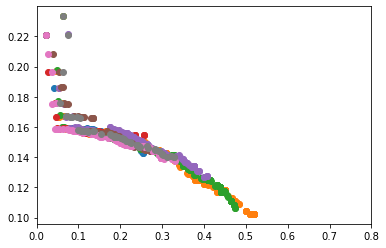

In [98]:
plt.xlim(0,0.8)
for (i,j) in zip(eu_density, eu_pairwise):
    plt.scatter(i, j)

plt.savefig("density_eu_pairwise.pdf",bbox_inches="tight")

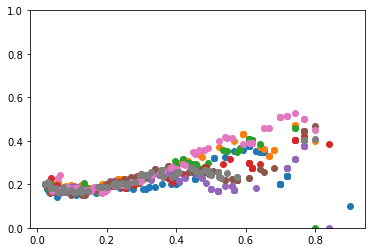

In [93]:
plt.ylim(0,1)
for (i,j) in zip(er_density, er_divergence):
    plt.scatter(i, j)

plt.savefig("density_er_divergence.pdf",bbox_inches="tight")

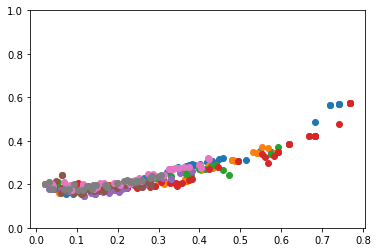

In [92]:
plt.ylim(0,1)
for (i,j) in zip(ea_density, ea_divergence):
    plt.scatter(i, j)

plt.savefig("density_ea_divergence.pdf",bbox_inches="tight")

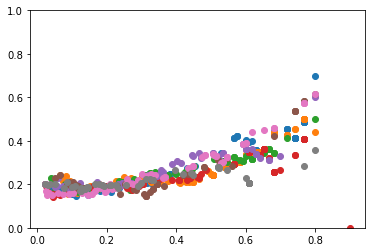

In [91]:
plt.ylim(0,1)
for (i,j) in zip(ef_density, ef_divergence):
    plt.scatter(i, j)

plt.savefig("density_ef_divergence.pdf",bbox_inches="tight")

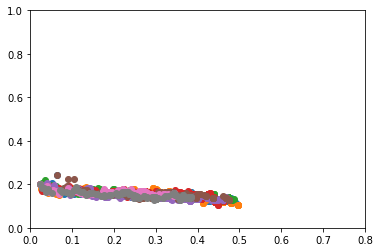

In [97]:
plt.ylim(0,1)
plt.xlim(0,0.8)
for (i,j) in zip(ec_density, ec_divergence):
    plt.scatter(i, j)

plt.savefig("density_ec_divergence.pdf",bbox_inches="tight")

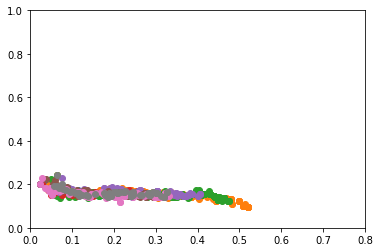

In [96]:
plt.ylim(0,1)
plt.xlim(0,0.8)
for (i,j) in zip(eu_density, eu_divergence):
    plt.scatter(i, j)

plt.savefig("density_eu_divergence.pdf",bbox_inches="tight")

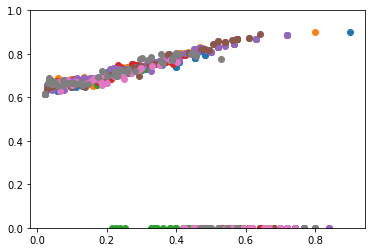

In [88]:
plt.ylim(0,1)
for (i,j) in zip(er_density, er_consensus):
    plt.scatter(i, j)

plt.savefig("density_er_consensus.pdf",bbox_inches="tight")

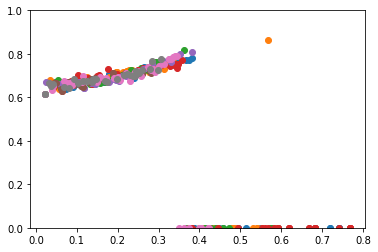

In [87]:
plt.ylim(0,1)
for (i,j) in zip(ea_density, ea_consensus):
    plt.scatter(i, j)

plt.savefig("density_ea_consensus.pdf",bbox_inches="tight")

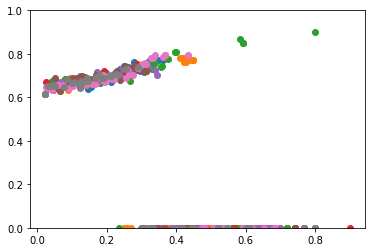

In [86]:
plt.ylim(0,1)
for (i,j) in zip(ef_density, ef_consensus):
    plt.scatter(i, j)

plt.savefig("density_ef_consensus.pdf",bbox_inches="tight")

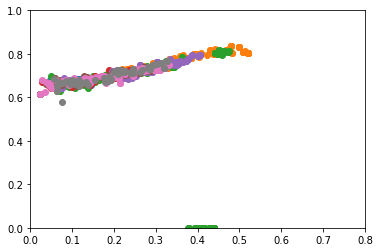

In [95]:
plt.ylim(0,1)
plt.xlim(0,0.8)
for (i,j) in zip(eu_density, eu_consensus):
    plt.scatter(i, j)

plt.savefig("density_eu_consensus.pdf",bbox_inches="tight")

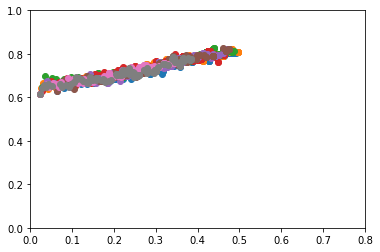

In [94]:
plt.ylim(0,1)
plt.xlim(0,0.8)
for (i,j) in zip(ec_density, ec_consensus):
    plt.scatter(i, j)

plt.savefig("density_ec_consensus.pdf",bbox_inches="tight")